In [8]:
# Step 1: Data Understanding and Representation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def eigen_decomposition(cov_matrix) :
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
  return eigenvalues, eigenvectors

# Load the dataset and represent features in matrix form
dataF = pd.read_csv('audi.csv')

# Drop non-numeric columns
data = dataF.drop(columns=['model', 'transmission', 'fuelType'])

# Step 2: Implementing PCA using Covariance Matrices
# Calculate the mean of each feature
mean_values = data.mean()

# Center the dataset by subtracting the mean
centered_data = data - mean_values

centered_data = centered_data / centered_data.std()

# Compute the covariance matrix
cov_matrix = centered_data.cov()

# Now we know that the eigenvalues and eigenvectors of the covariance matrix are needed

# Step 3: Eigenvalue-Eigenvector Equation
# The function eigen_decomposition solves the eigenvalue-eigenvector equation and returns the eigenvalue-eigenvector values
eigenvalues, eigenvectors = eigen_decomposition(cov_matrix)

# Sort eigenvalues and eigenvectors correspondingly
sorted_indices = np.argsort(eigenvalues)[::-1]  # Get indices in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]

# Find the eigenvectors corresponding to the largest k eigenvectors (k varies from 1 to 6 (the number of features))
total_variance = sum(eigenvalues)
print(f"Total Variance covered by all principal components: {total_variance}")

# Get the number of features that take numerical values
num_numerical_features = 6

variance_cumulative = 0
variance_array = np.array([])
eigenvectors_count = np.array([])

for k in range(1, num_numerical_features + 1):
  variance_cumulative += sorted_eigenvalues[k-1] # since indexing starts from 0
  print(f"Total variance when top {k} principal components are considered: {variance_cumulative}")
  variance_array = np.append(variance_array, (variance_cumulative/total_variance)*100)
  eigenvectors_count = np.append(eigenvectors_count, k)

varianceDF = pd.DataFrame({'Num of Principal Components': eigenvectors_count, 'Percentage Variance covered': variance_array})

# Display the dataframe
display(varianceDF)


# # Step 7: Conclusion and Interpretation
# # Interpret the results obtained from PCA analysis

# # Step 8: Documentation and Presentation
# # Provide a well-documented report detailing the steps performed, mathematical derivations, and code implementation.
# # Include visual representations to support the analysis


Total Variance covered by all principal components: 6.000000000000006
Total variance when top 1 principal components are considered: 3.006000257279839
Total variance when top 2 principal components are considered: 4.558866491556762
Total variance when top 3 principal components are considered: 5.344487601473164
Total variance when top 4 principal components are considered: 5.663077682606352
Total variance when top 5 principal components are considered: 5.8661323414188145
Total variance when top 6 principal components are considered: 6.000000000000006


,Num of Principal Components,Percentage Variance covered
0,1.0,50.100004
1,2.0,75.981108
2,3.0,89.074793
3,4.0,94.384628
4,5.0,97.768872
5,6.0,100.000000


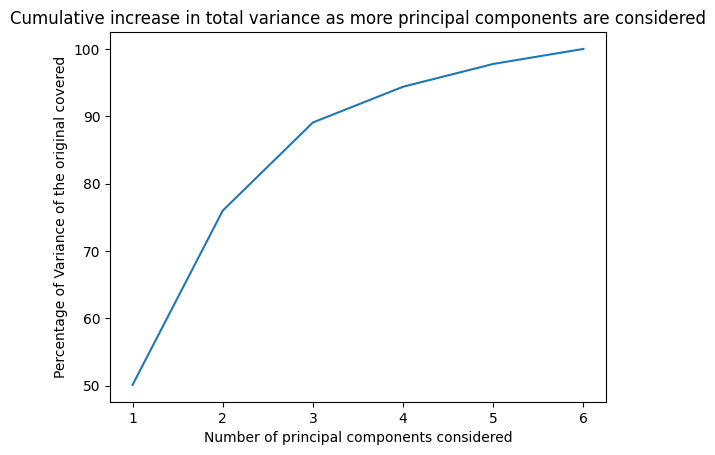

In [4]:
plt.plot(eigenvectors_count, variance_array)
plt.xlabel('Number of principal components considered') # principal components = eigenvectors
plt.ylabel('Percentage of Variance of the original covered')
plt.title('Cumulative increase in total variance as more principal components are considered')
plt.show()

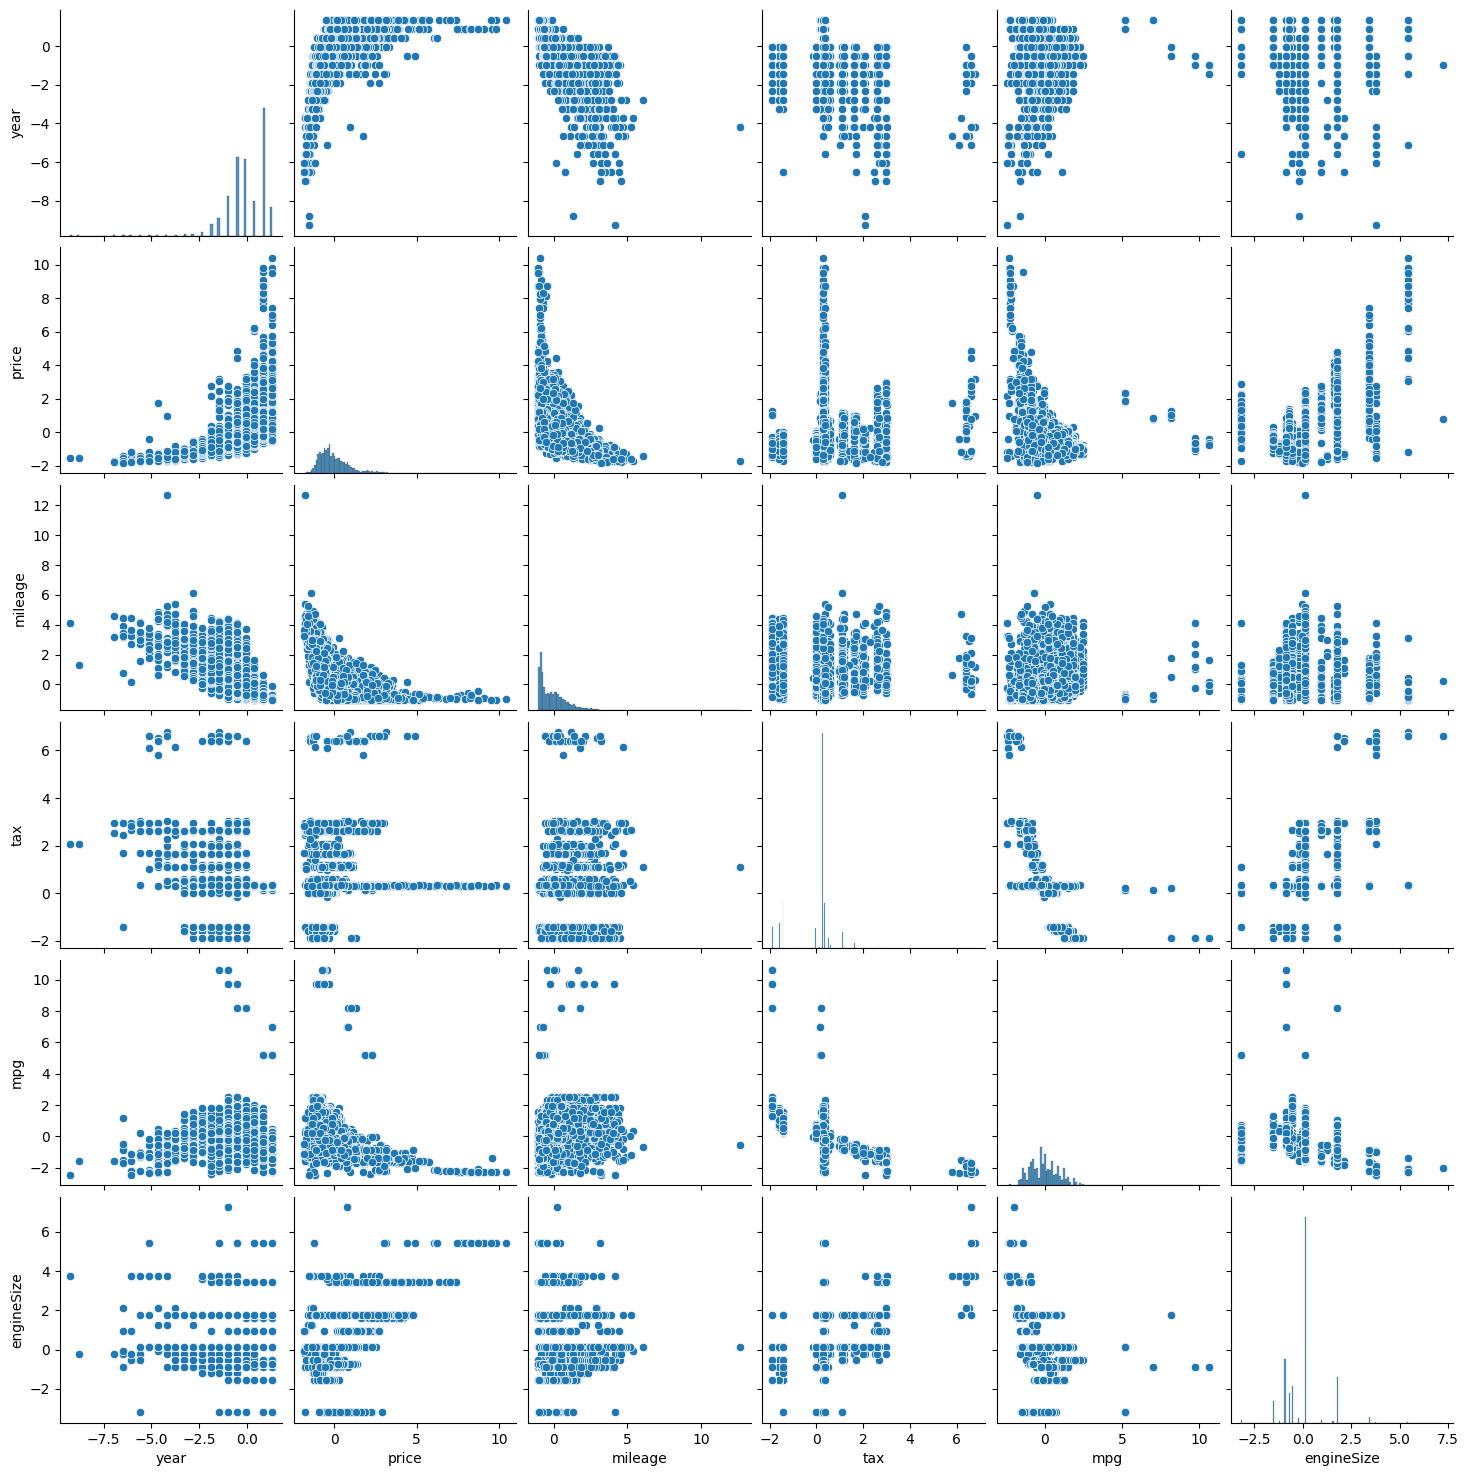

In [5]:
# Plot pair plots
import seaborn as sns

centered_data = pd.DataFrame(centered_data)
pair_plot = sns.pairplot(centered_data) 

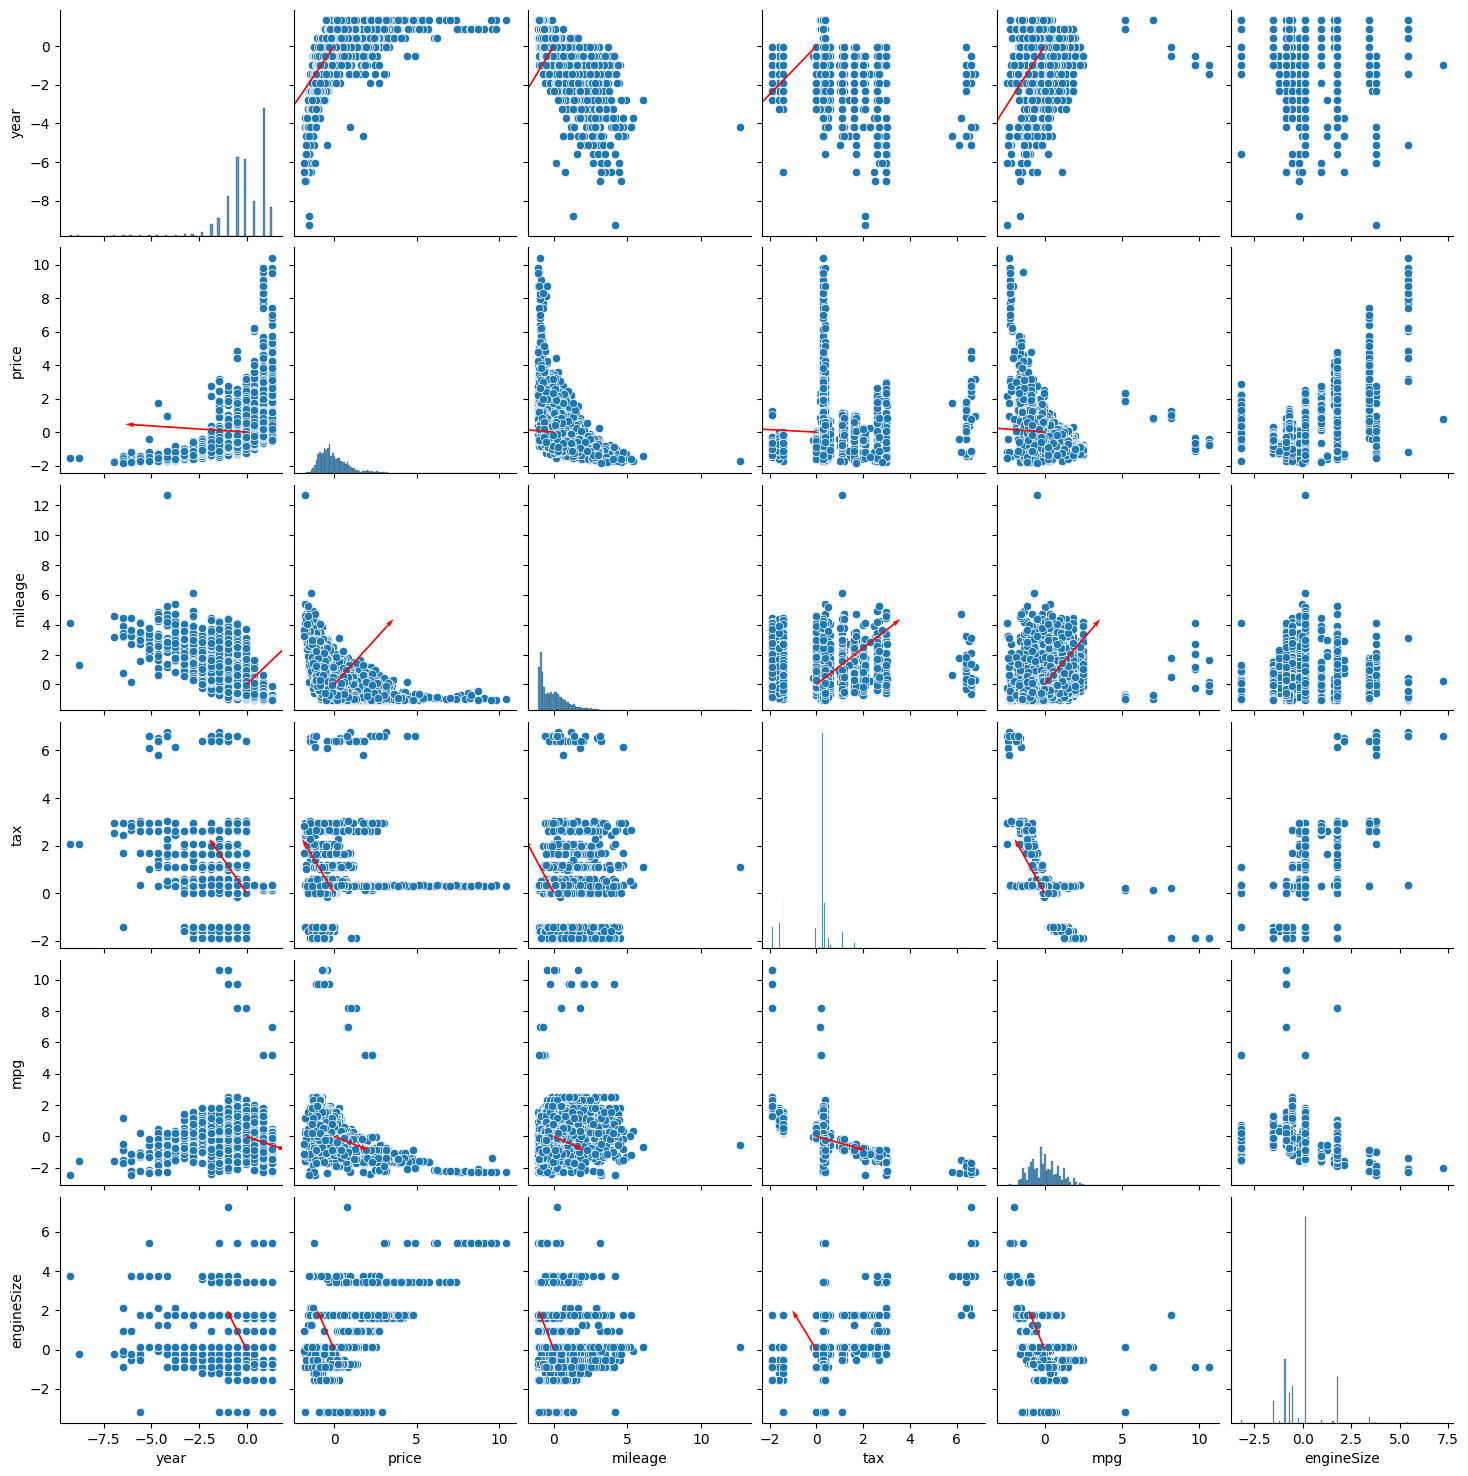

In [7]:
df1 = centered_data
g = sns.pairplot(df1)

axes = g.axes
X = centered_data.drop('price', axis = 1)

for i in range(df1.shape[1]):
    for j in range(X.shape[1]):
        if i != j:
            pc = eigenvectors[i]

            pc_scaled = np.sqrt(sorted_eigenvalues[i]) * pc

            axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='r')

plt.show()